In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
import matplotlib.pyplot as plt
# here we are working on Tensorflow version 2.1.0 so we need to write tensorflow.keras.
#keras is in built function in Tensorflow.
import os
import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [35]:
train_location = "/content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Dataset"
test_location = "/content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Dataset"
filepath = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Model/MobileNet_CNN_model_Training.keras'


In [36]:
preprocess_input = tensorflow.keras.applications.mobilenet.preprocess_input

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [37]:

IMAGE_SIZE = 224               # for mobileNet Image size should be 224
TRAIN_BATCH_SIZE = 10
VALIDATION_BATCH_SIZE = 10
num_class=2

In [38]:

train_batches = datagen.flow_from_directory(train_location,
                                            target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size=TRAIN_BATCH_SIZE)

valid_batches = datagen.flow_from_directory(test_location,
                                            target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size=VALIDATION_BATCH_SIZE)

Found 82 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [39]:
base_model = tensorflow.keras.applications.mobilenet.MobileNet()

In [40]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [41]:
# how many layers does MobileNet have?
print("number of layers of MobilNet = ", len(base_model.layers))

number of layers of MobilNet =  91


In [42]:
# [CREATE THE MODEL ARCHITECTURE]

# exclude the last 5 layers of the above model
x = base_model.layers[-6].output

# create a new dense layer for predictions
# flatten the output layer to 1 dimension
x = tensorflow.keras.layers.Flatten()(x)
# create a new dense layer for predictions
x = tensorflow.keras.layers.Dense(1024, activation='relu')(x)
# 7 corresponds to the number of classes
x = tensorflow.keras.layers.Dropout(0.25)(x)
predictions = tensorflow.keras.layers.Dense(num_class, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer created above

model = tensorflow.keras.models.Model(inputs=base_model.input, outputs=predictions)

# choose how many layers I actually want to be trained

# freeze the weights of all layers except the last 23 layers in the new model
# the last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False

In [43]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 54,612,162 (208.33 MB)

 Trainable params: 53,245,954 (203.12 MB)

 Non-trainable params: 1,366,208 (5.21 MB)

In [44]:
optimum=Adam(learning_rate=0.005)
model.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
# get the labels that are associated with each index
print(valid_batches.class_indices)

{'Exodate': 0, 'Healthy': 1}


In [46]:
TRAIN_STEPS=train_batches.n//train_batches.batch_size
TRAIN_STEPS

8

In [47]:
VALIDATION_STEPS=valid_batches.n//valid_batches.batch_size
VALIDATION_STEPS


8

In [48]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [49]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.5,
                              patience=2,
                              verbose=1,
                              mode='max',
                              min_lr=0.00001)

In [50]:
callbacks_list = [checkpoint, reduce_lr]

In [51]:
#history = detection.fit_generator(train_generator,
history =  model.fit(train_batches,
                              steps_per_epoch=TRAIN_STEPS,
                              #class_weight=class_weights,
                              validation_data=valid_batches,
                              validation_steps=VALIDATION_STEPS,
                              epochs=5,
                              verbose=1,
                              callbacks=callbacks_list
                             )

Epoch 1/20
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.5305 - loss: 152.3455
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to /content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Model/MobileNet_CNN_model_Training.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5299 - loss: 164.1128 - val_accuracy: 0.4375 - val_loss: 238.7901 - learning_rate: 0.0050
Epoch 2/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 76.8349
Epoch 2: val_accuracy did not improve from 0.43750
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.5000 - loss: 76.8349 - val_accuracy: 0.0000e+00 - val_loss: 288.6904 - learning_rate: 0.0050
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5219 - loss: 52.7509
Epoch 3: val_accuracy improved from 0.43750 to 0.56250, saving model to /content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Model/MobileNet_CNN_model_Training.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5180 - loss: 5

In [52]:
# get the metric names so I can use evaulate_generator
model.metrics_names

['loss', 'compile_metrics']

In [53]:
model.evaluate(valid_batches,steps=TRAIN_STEPS)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.8433 - loss: 4.7664


[4.639277935028076, 0.8500000238418579]

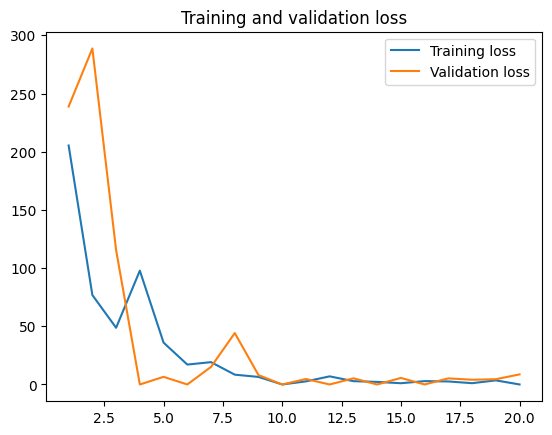

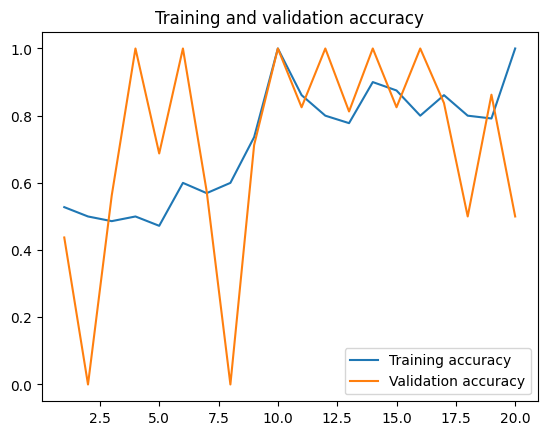

<Figure size 640x480 with 0 Axes>

In [56]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()